In [1]:
#importing the libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sns

import statsmodels.api as sm
from scipy import stats
from statsmodels.formula.api import ols

In [2]:
#import the data
churndf = pd.read_csv("churndata.csv")

In [3]:
#printing the top 5 row of the dataset
churndf.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#checking the total number of rows and columns
churndf.shape

(7043, 21)

In [5]:
#checking datatype of the columns
churndf.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
#checking null values
churndf.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#  Replacing Incorrect Values

In [7]:
#Replacing inccrect values will null values also correcting the datatype of the columns
churndf.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
#replacing incorrect Total Charges values with NaN and changing column datatype to float
churndf['TotalCharges'] = pd.to_numeric(churndf['TotalCharges'], downcast='float', errors='coerce')

In [9]:
churndf.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float32
Churn                object
dtype: object

# Dropping Unnecessary Columns/Data & Dealing with Missing/Null Values

In [10]:
#Checking missung/Null values in the columns
churndf.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

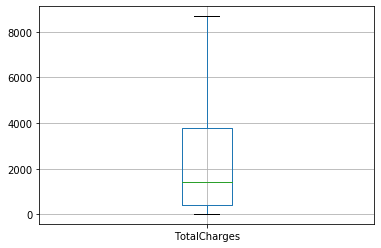

In [11]:
#to check any outliers
churndf.boxplot(column='TotalCharges', sym='o', return_type='axes')

In [12]:
churndf['TotalCharges'].value_counts()

20.200001      11
19.750000       9
20.049999       8
19.900000       8
19.650000       8
               ..
1451.599976     1
1173.349976     1
5589.450195     1
3810.550049     1
1024.000000     1
Name: TotalCharges, Length: 6530, dtype: int64

In [13]:
#Since this columns has too maany different values and the number of missing/null values only makeup to less than 0.5% of
#the data hence the best option is to remove the rows containing these null values.
churndf = churndf.drop(churndf[churndf['TotalCharges'].isnull()].index)

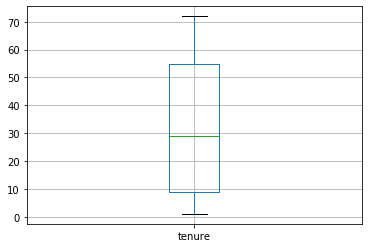

In [14]:
#to check any outliers
churndf.boxplot(column='tenure', sym='o', return_type='axes')

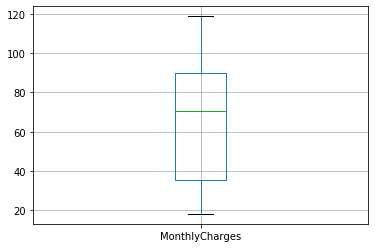

In [15]:
churndf.boxplot(column='MonthlyCharges', sym='o', return_type='axes')

In [16]:
#Along with this the column 'customerID' contains the ID which will not be usefull in our analysis hence dropping this column.
churndf = churndf.drop('customerID', axis=1)

# t-test

In [17]:
types_map = churndf.dtypes.to_dict()
num_columns = []
for k,v in types_map.items():
    if np.issubdtype(np.int64, v) or np.issubdtype(np.float64, v) or np.issubdtype(np.float32, v):
        num_columns.append(k)

print(num_columns)

for i in range(len(num_columns)-1):
    for j in range(i+1,len(num_columns)):
        col1 = num_columns[i]
        col2 = num_columns[j]
        t_val, p_val = stats.ttest_ind(churndf[col1], churndf[col2])
        print("(%s,%s) => t-value=%s, p-value=%s" % (num_columns[i], num_columns[j], str(t_val), str(p_val)))

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
(SeniorCitizen,tenure) => t-value=-110.19930682001105, p-value=0.0
(SeniorCitizen,MonthlyCharges) => t-value=-180.14238265109182, p-value=0.0
(SeniorCitizen,TotalCharges) => t-value=-84.46249234456064, p-value=0.0
(tenure,MonthlyCharges) => t-value=-69.92300630034109, p-value=0.0
(tenure,TotalCharges) => t-value=-83.26420730219256, p-value=0.0
(MonthlyCharges,TotalCharges) => t-value=-82.06412611168557, p-value=0.0


# anova

In [18]:
#anova
model = ols('tenure ~ C(Q("Churn"))', data=churndf).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print ("\nAnova => tenure - Churn")
display(anova_table)

model = ols('SeniorCitizen ~ C(Q("Churn"))', data=churndf).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print ("\nAnova => Senior Citizen - Churn")
display(anova_table)

model = ols('MonthlyCharges ~ C(Q("Churn"))', data=churndf).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print ("\nAnova => Monthly Charges - Churn")
display(anova_table)

model = ols('TotalCharges ~ C(Q("Churn"))', data=churndf).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print ("\nAnova => Total Charges - Churn")
display(anova_table)


Anova => tenure - Churn


,sum_sq,df,F,PR(>F)
"C(Q(""Churn""))",5.309822e+05,1.0,1007.509431,9.437650e-207
Residual,3.704983e+06,7030.0,NaN,NaN



Anova => Senior Citizen - Churn


,sum_sq,df,F,PR(>F)
"C(Q(""Churn""))",21.677662,1.0,163.012426,6.377295e-37
Residual,934.861018,7030.0,NaN,NaN



Anova => Monthly Charges - Churn


,sum_sq,df,F,PR(>F)
"C(Q(""Churn""))",2.367127e+05,1.0,271.57699,6.760843e-60
Residual,6.127508e+06,7030.0,NaN,NaN



Anova => Total Charges - Churn


,sum_sq,df,F,PR(>F)
"C(Q(""Churn""))",1.437636e+09,1.0,291.344864,4.876862e-64
Residual,3.468942e+10,7030.0,NaN,NaN


# Data Exploration:

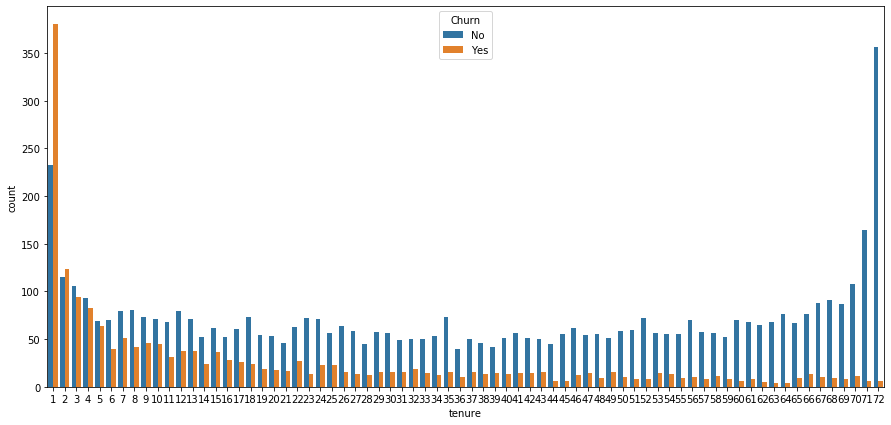

In [19]:
#plotting bar charts for better understanding the relation b/w numerical columns and churn
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
Tenure = sns.countplot(ax=ax, data=churndf, x=churndf.tenure, hue='Churn')

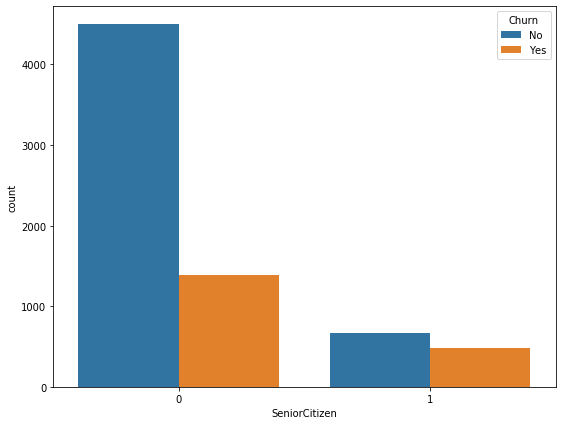

In [20]:
a4_dims = (9, 7)
fig, ax = plt.subplots(figsize=a4_dims)
SeniorCitizen = sns.countplot(ax=ax, data=churndf, x=churndf.SeniorCitizen, hue='Churn')

Text(0.5, 0, 'MontlyCharges')

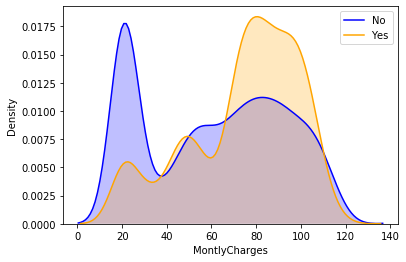

In [21]:
#Making the monthly and total charges with kde since there are too many values which couldnot be displayed by countplot
MonthlyCharges = sns.kdeplot(churndf.MonthlyCharges[(churndf["Churn"] == "No") ], color="Blue", shade = True, label="No")
MonthlyCharges = sns.kdeplot(churndf.MonthlyCharges[(churndf["Churn"] == "Yes") ], color="Orange", shade= True, label="Yes")
MonthlyCharges.set_ylabel('Density')
MonthlyCharges.set_xlabel('MontlyCharges')

Text(0.5, 0, 'TotalCharges')

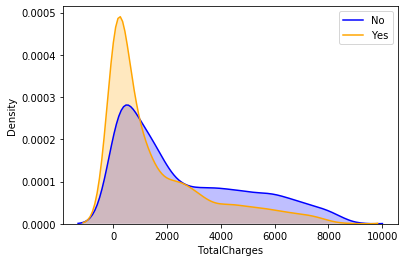

In [22]:
TotlaCharges = sns.kdeplot(churndf.TotalCharges[(churndf["Churn"] == "No") ], color="Blue", shade = True, label="No")
TotalCharges = sns.kdeplot(churndf.TotalCharges[(churndf["Churn"] == "Yes") ], color="Orange", shade= True, label="Yes")
TotalCharges.set_ylabel('Density')
TotalCharges.set_xlabel('TotalCharges')

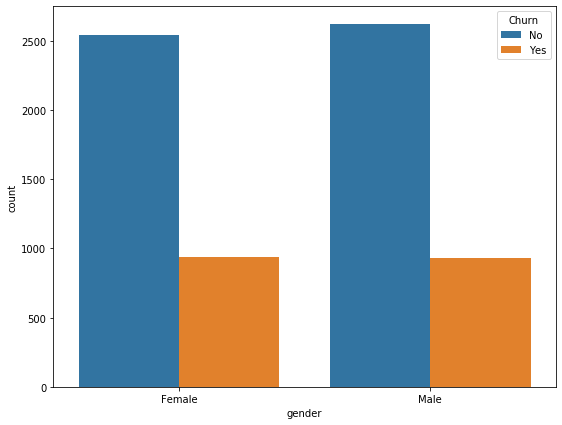

In [23]:
#plotting bar charts for better understanding the relation b/w categorical columns and churn
a4_dims = (9, 7)
fig, ax = plt.subplots(figsize=a4_dims)
Gender = sns.countplot(ax=ax, data=churndf, x=churndf.gender, hue='Churn')

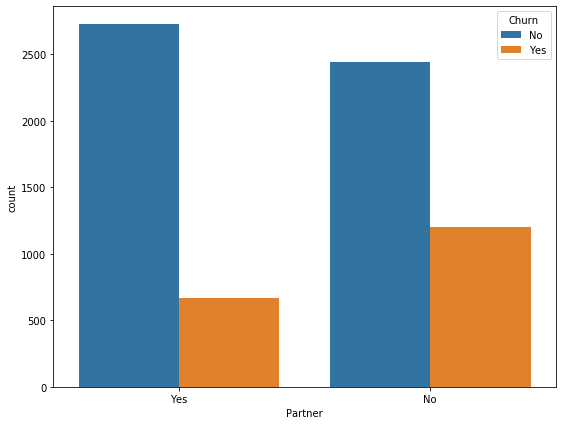

In [24]:
a4_dims = (9, 7)
fig, ax = plt.subplots(figsize=a4_dims)
Partner = sns.countplot(ax=ax, data=churndf, x=churndf.Partner, hue='Churn')

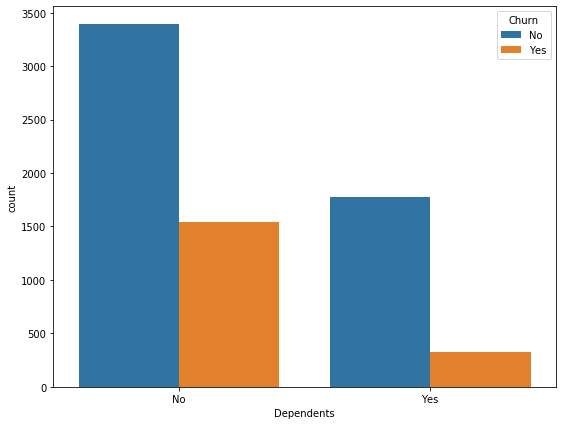

In [25]:
a4_dims = (9, 7)
fig, ax = plt.subplots(figsize=a4_dims)
Dependents = sns.countplot(ax=ax, data=churndf, x=churndf.Dependents, hue='Churn')

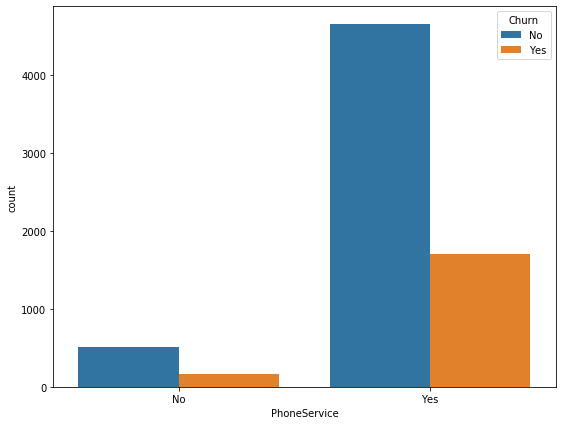

In [26]:
a4_dims = (9, 7)
fig, ax = plt.subplots(figsize=a4_dims)
PhoneService = sns.countplot(ax=ax, data=churndf, x=churndf.PhoneService, hue='Churn')

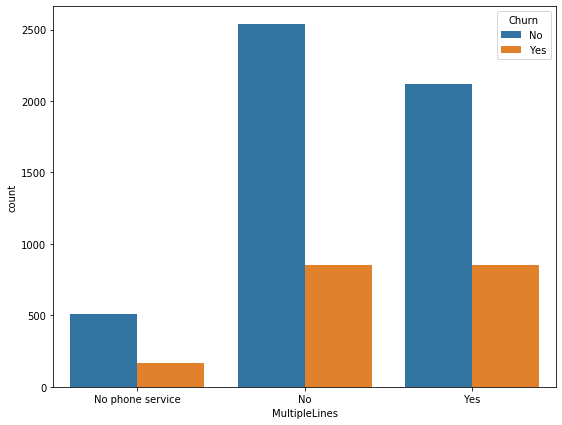

In [27]:
a4_dims = (9, 7)
fig, ax = plt.subplots(figsize=a4_dims)
MultipleLines = sns.countplot(ax=ax, data=churndf, x=churndf.MultipleLines, hue='Churn')

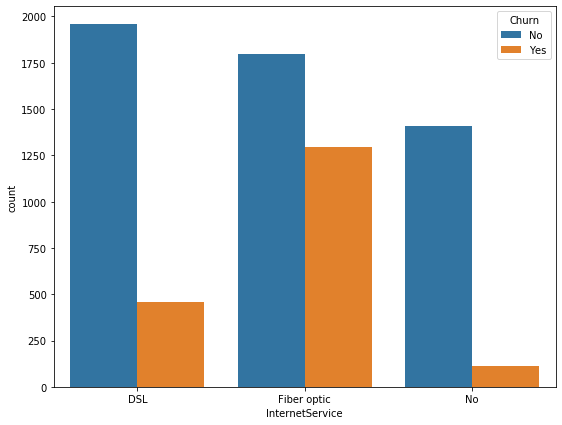

In [28]:
a4_dims = (9, 7)
fig, ax = plt.subplots(figsize=a4_dims)
InternetService = sns.countplot(ax=ax, data=churndf, x=churndf.InternetService, hue='Churn')

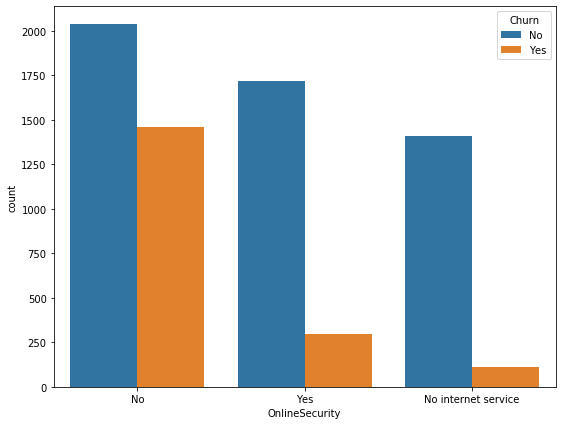

In [29]:
a4_dims = (9, 7)
fig, ax = plt.subplots(figsize=a4_dims)
OnlineSecurity = sns.countplot(ax=ax, data=churndf, x=churndf.OnlineSecurity, hue='Churn')

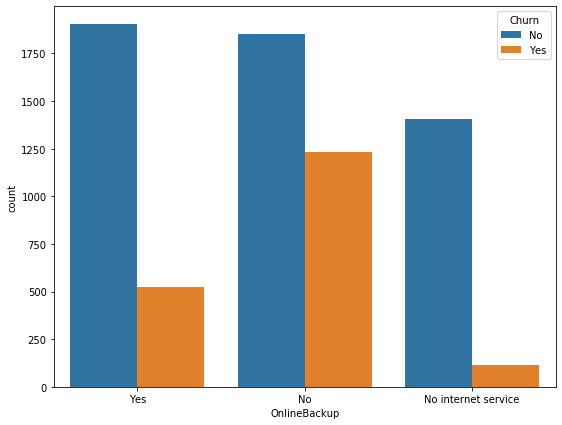

In [30]:
a4_dims = (9, 7)
fig, ax = plt.subplots(figsize=a4_dims)
OnlineBackup = sns.countplot(ax=ax, data=churndf, x=churndf.OnlineBackup, hue='Churn')

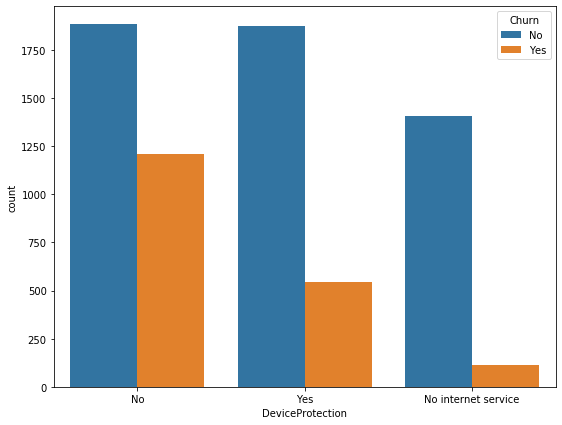

In [31]:
a4_dims = (9, 7)
fig, ax = plt.subplots(figsize=a4_dims)
DeviceProtection = sns.countplot(ax=ax, data=churndf, x=churndf.DeviceProtection, hue='Churn')

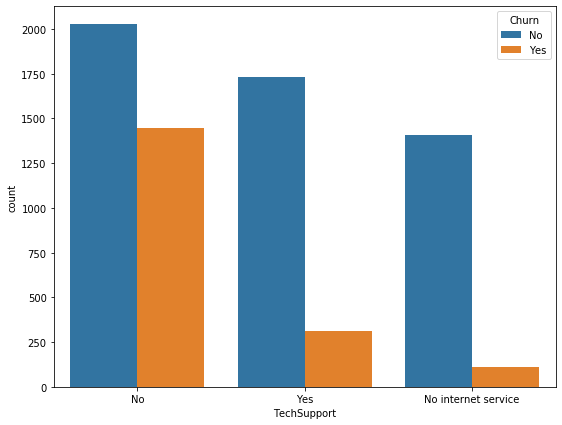

In [32]:
a4_dims = (9, 7)
fig, ax = plt.subplots(figsize=a4_dims)
TechSupport = sns.countplot(ax=ax, data=churndf, x=churndf.TechSupport, hue='Churn')

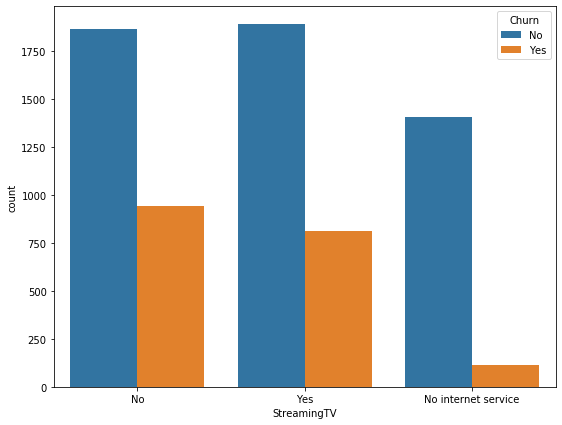

In [33]:
a4_dims = (9, 7)
fig, ax = plt.subplots(figsize=a4_dims)
StreamingTV = sns.countplot(ax=ax, data=churndf, x=churndf.StreamingTV, hue='Churn')

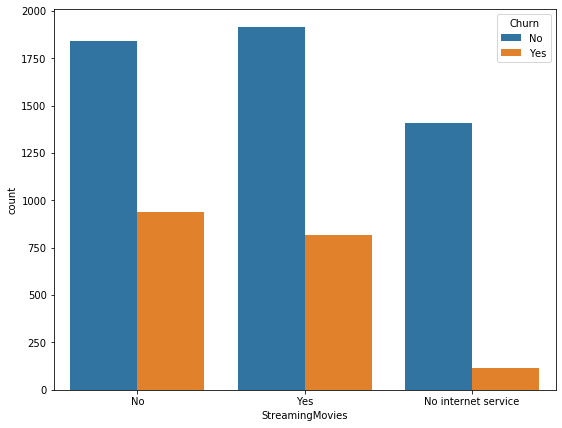

In [34]:
a4_dims = (9, 7)
fig, ax = plt.subplots(figsize=a4_dims)
StreamingMovies = sns.countplot(ax=ax, data=churndf, x=churndf.StreamingMovies, hue='Churn')

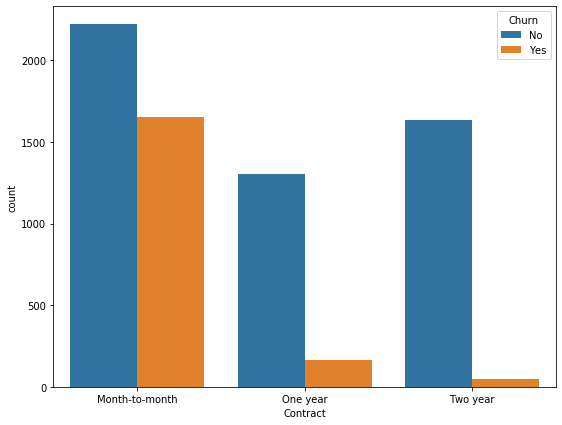

In [35]:
a4_dims = (9, 7)
fig, ax = plt.subplots(figsize=a4_dims)
Contract = sns.countplot(ax=ax, data=churndf, x=churndf.Contract, hue='Churn')

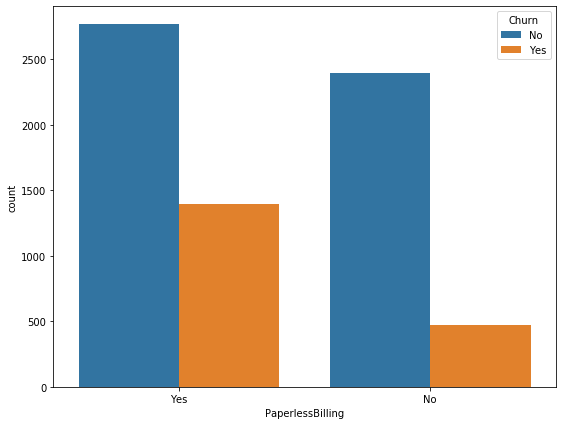

In [36]:
a4_dims = (9, 7)
fig, ax = plt.subplots(figsize=a4_dims)
PaperlessBilling = sns.countplot(ax=ax, data=churndf, x=churndf.PaperlessBilling, hue='Churn')

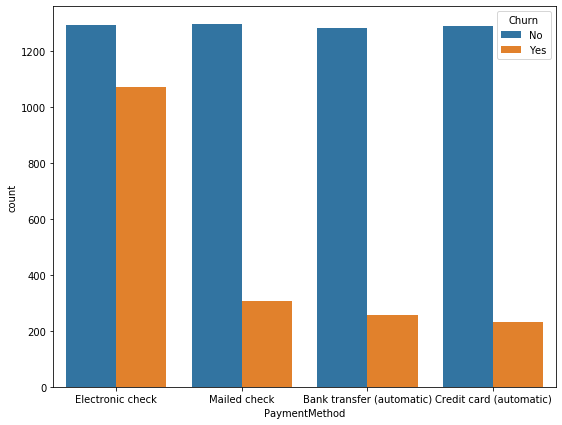

In [37]:
a4_dims = (9, 7)
fig, ax = plt.subplots(figsize=a4_dims)
PaymentMethod = sns.countplot(ax=ax, data=churndf, x=churndf.PaymentMethod, hue='Churn')

In [38]:
churndf.to_csv("TelcoChurnData.csv")